In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

import seaborn as sns

import pandas as pd

C:\Users\Victor\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


## Model for sentiment

In [2]:
df_sentiment = pd.read_csv('sentiment_large.csv')
df_sentiment = df_sentiment.drop(columns='Unnamed: 0')
df_sentiment = df_sentiment.iloc[:,:2501] #Empirically, I have tested that these columns offer the same performance. Same results and less complex!
df_sentiment

,Sentiment,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,1,1,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = torch.tensor(df_sentiment['Sentiment'].values).flatten()

In [4]:
X = np.stack([df_sentiment.iloc[:,i].values for i in range(1,2501)], 1)

In [5]:
y.shape

torch.Size([10000])

In [6]:
X.shape

(10000, 2500)

In [7]:
X = torch.tensor(X, dtype=torch.float)

### Perform train/test splits

Our tensors has already been shuffled

In [8]:
batch_size = 10000 #includes test+train
test_size = 2000

X_train = X[:batch_size-test_size]
X_test = X[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [9]:
len(X_train)

8000

In [10]:
len(X_test)

2000

In [11]:
X_train.shape

torch.Size([8000, 2500])

### Create the model

In [12]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=2500, out_sz=2, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        self.drop = nn.Dropout(0.5)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.drop(X)
        X = F.relu(self.fc2(X))
        X = self.drop(X)
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [13]:
torch.manual_seed(101)
model_sentiment_torch = MultilayerPerceptron()
model_sentiment_torch

MultilayerPerceptron(
  (fc1): Linear(in_features=2500, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
  (drop): Dropout(p=0.5)
)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_sentiment_torch.parameters(), lr=0.001)

## Train the model

In [15]:
import time
start_time = time.time()

epochs = 27
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_sentiment_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_sentiment_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)


print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.69234240
epoch:  26  loss: 0.34781450
epoch:  27  loss: 0.45214278

Duration: 8 seconds


## Validate the model

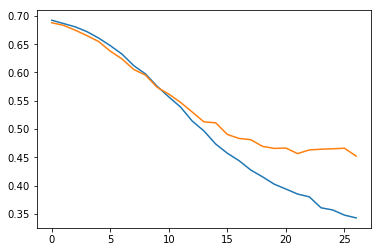

In [16]:
plt.plot(range(epochs),losses)
plt.plot(range(epochs), test_losses)

Accuracy is:  0.82


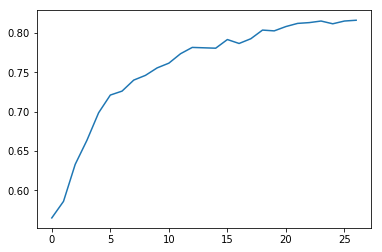

In [17]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)

print("Accuracy is: ", "{:.2f}".format(test_correct_percentage[-1].item()))

## Model for rating

In [3]:
df_rating = pd.read_csv('rating_large.csv')
df_rating = df_rating.drop(columns='Unnamed: 0')
df_rating = df_rating.iloc[:,:2501]
df_rating

,Rating,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,4,1,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = torch.tensor(df_rating['Rating'].values).flatten()
y = y-1

In [5]:
X = np.stack([df_rating.iloc[:,i].values for i in range(1,2501)], 1)

In [6]:
y.shape

torch.Size([10000])

In [7]:
X.shape

(10000, 2500)

In [8]:
X = torch.tensor(X, dtype=torch.float)

### Perform train/test splits

Our tensors has already been shuffled

In [9]:
batch_size = 10000 #includes test+train
test_size = 2000

X_train = X[:batch_size-test_size]
X_test = X[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [10]:
len(X_train)

8000

In [11]:
len(X_test)

2000

In [12]:
X_train.shape

torch.Size([8000, 2500])

### Create the model

In [13]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=2500, out_sz=4, layers=[168,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        self.drop = nn.Dropout(0.05)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.drop(X)
        X = F.relu(self.fc2(X))
        X = self.drop(X)
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [14]:
torch.manual_seed(101)
model_rating_torch = MultilayerPerceptron()
model_rating_torch

MultilayerPerceptron(
  (fc1): Linear(in_features=2500, out_features=168, bias=True)
  (fc2): Linear(in_features=168, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
  (drop): Dropout(p=0.05)
)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_rating_torch.parameters(), lr=0.001)

## Train the model

In [16]:
import time
start_time = time.time()

epochs = 40
losses = []
test_losses=[]
test_correct = []

for i in range(epochs):
    tst_corr=0
    i+=1
    y_pred = model_rating_torch(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_val = model_rating_torch(X_test)
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum().float()
        test_correct.append(tst_corr)


print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 1.35244215
epoch:  26  loss: 0.84945560
epoch:  40  loss: 0.77392584

Duration: 16 seconds


## Validate the model

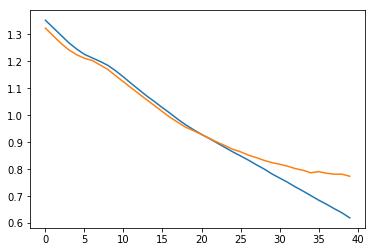

In [17]:
plt.plot(range(epochs),losses)
plt.plot(range(epochs), test_losses)

Accuracy is:  0.69


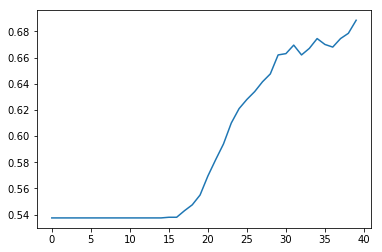

In [18]:
test_correct_percentage = [elemento/len(y_test) for elemento in test_correct]

plt.plot(range(epochs), test_correct_percentage)

print("Accuracy is: ", "{:.2f}".format(test_correct_percentage[-1].item()))

In [19]:
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[158  57   7   3]
 [ 66 132  60  26]
 [  6  52  94  53]
 [ 20  65 208 993]]


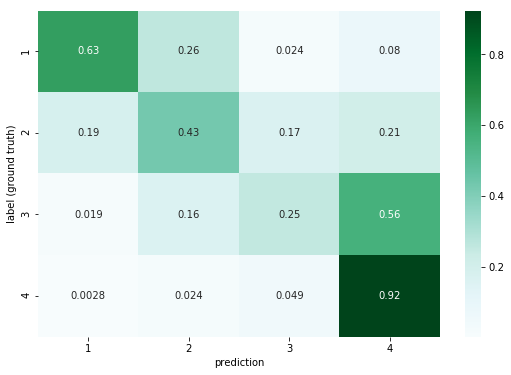

In [39]:
cm = confusion_matrix(y_test.view(-1), predicted.view(-1))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


df_cmn = pd.DataFrame(cmn, ratings, ratings)
plt.figure(figsize = (9,6))
sns.heatmap(df_cmn, annot=True, cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();